# Project on predicting Employee Attrition prediction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

In [2]:
data = attrition = pd.read_csv('HR_employee_data.csv')

In [3]:
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
data.groupby(['Department']).agg('sum').query( 'DistanceFromHome >= 5000')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,
Research & Development,35598,775384,8788,2786,961,967250,2637,63587,2635,1900,...,2603,76880,773,10900,2684,2619,6597,3993,2054,3925


In [42]:
data.sort_values(['Age','DistanceFromHome'], ascending=[True,False]).query('DistanceFromHome >= 25   BusinessTravel == `Non-travel`')


UndefinedVariableError: name 'BACKTICK_QUOTED_STRING_Non_MINUS_travel' is not defined

In [49]:
# sales_data.query('(sales > 50000) and (region in ["East", "West"])')
data.query('(DistanceFromHome >= 25 ) and  (BusinessTravel == "Travel_Rarely")')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,...,4,80,1,5,1,2,5,2,4,3
42,26,Yes,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,55,...,3,80,0,1,2,2,1,0,0,1
63,59,No,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,81,...,4,80,0,28,3,2,21,16,7,9
134,26,No,Travel_Rarely,1355,Human Resources,25,1,Life Sciences,1,177,...,4,80,1,8,3,3,8,7,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,...,3,80,1,21,3,3,20,7,0,10
1446,34,No,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,...,4,80,2,8,2,3,8,7,1,7
1450,35,No,Travel_Rarely,1146,Human Resources,26,4,Life Sciences,1,2040,...,3,80,0,9,2,3,9,0,1,7
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4


In [54]:
data.sort_values(['Age','DistanceFromHome'], ascending=[True,False]).query('(DistanceFromHome >= 25 ) and  (BusinessTravel == "Travel_Rarely")').groupby(['Age','DistanceFromHome','BusinessTravel'])


In [102]:
target_map = {'Yes': 1, 'No': 0}
data['Attrition_numerical'] = data['Attrition'].apply(lambda x:target_map[x])



In [103]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,0


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [105]:
data_num = data.select_dtypes(include = 'int64').columns.tolist()

In [106]:
data_cat = data.select_dtypes(include = 'object').columns.tolist()


In [107]:
data = [
    go.Heatmap(
        z= attrition[data_num].astype(float).corr().values, # Generating the Pearson correlation
        x=attrition[data_num].columns.values,
        y=attrition[data_num].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [108]:
## Feature Engineering

In [109]:
attrition_cat = attrition[data_cat]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column


attrition_cat = pd.get_dummies(attrition_cat)


attrition_cat.head(3)


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [110]:
attrition_num = attrition[data_num]
attrition_num

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,1102,1,2,1,1,2,94,3,2,...,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,...,80,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,80,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,7,1,40,3,1,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,80,1,17,3,3,5,2,0,3,0
1466,39,613,6,1,1,2062,4,42,2,3,...,80,1,9,5,3,7,7,1,7,0
1467,27,155,4,3,1,2064,2,87,4,2,...,80,1,6,0,3,6,2,0,3,0
1468,49,1023,2,3,1,2065,4,63,2,2,...,80,0,17,3,2,9,6,0,8,0


In [111]:
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
attrition_final.head(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0


In [112]:
df = attrition_final.copy()

In [113]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [127]:
df.loc[:, df.columns.str.startswith('A')]

,Age,Attrition_numerical
0,41,1
1,49,0
2,37,1
3,33,0
4,27,0
...,...,...
1465,36,0
1466,39,0
1467,27,0
1468,49,0


In [128]:
#checking the number of yes and no for target variable

df['Attrition_numerical'].value_counts()

0    1233
1     237
Name: Attrition_numerical, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Attrition_numerical', ylabel='count'>

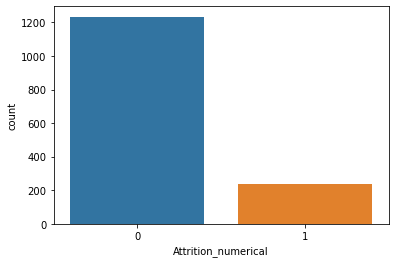

In [122]:
sns.countplot(df['Attrition_numerical'], label = "Count")

In [117]:
### Since 1's are only 237 and no's are 1233  we will stratify split

In [118]:
attrition_final.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1


In [93]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [134]:
x = df.loc[:,df.columns != 'Attrition_numerical']
y = df['Attrition_numerical']

## Modeling

In [137]:

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.80,random_state=0)

In [143]:
X_test

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
442,36,635,10,4,1,592,2,32,3,3,...,0,0,1,0,0,0,1,1,1,0
1091,33,575,25,3,1,1545,4,44,2,2,...,0,0,0,0,0,0,1,1,1,0
981,35,662,18,4,1,1380,4,67,3,2,...,0,0,1,0,0,1,0,1,0,1
785,40,1492,20,4,1,1092,1,61,3,3,...,0,0,0,0,0,1,0,1,1,0
1332,29,459,24,2,1,1868,4,73,2,1,...,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,36,557,3,3,1,2024,1,94,2,3,...,0,0,1,0,0,1,0,1,1,0
481,34,254,1,2,1,649,2,83,2,1,...,0,1,0,0,0,1,0,1,0,1
124,31,249,6,4,1,163,2,76,1,2,...,0,0,1,0,0,1,0,1,0,1
198,38,1261,2,4,1,271,4,88,3,2,...,0,0,0,0,0,1,0,1,1,0


In [140]:
oversampler = SMOTE(random_state= 1)

In [151]:
smote_train,smote_target = oversampler.fit_resample(X_train,y_train)

In [146]:
# Random Forest parameters
seed = 0 
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}


In [152]:
rf = RandomForestClassifier(**rf_params)

rf.fit(smote_train, smote_target)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=1000,
                       n_jobs=-1, random_state=0)

In [161]:
rf_predictions = rf.predict(X_test)

print("Accuracy score: {}".format(accuracy_score(y_test, rf_predictions)))

Accuracy score: 0.8435374149659864


In [159]:
print("Accuracy on training set ", rf.score(X_train, y_train))

print("Accuracy on test set ", rf.score(X_test, y_test))

Accuracy on training set  0.8971088435374149
Accuracy on test set  0.8435374149659864


In [170]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       245
           1       0.54      0.43      0.48        49

    accuracy                           0.84       294
   macro avg       0.71      0.68      0.69       294
weighted avg       0.83      0.84      0.84       294



In [ ]:
## Feature importance

In [179]:
graph = go.Scatter(x = df.columns.values, y = rf.feature_importances_)

layout= go.Layout(
    autosize= False,
    title= 'Random Forest Feature Importance',
    
    )

fig = go.Figure(data=graph, layout=layout)
py.iplot(fig,filename='scatter2010')

In [174]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')